# First Order Equations

A [differential equation](https://en.wikipedia.org/wiki/Differential_equation) is an equation involving an unknown function $y(t)$ and its derivatives $y',y'',\dots$, and the [order](https://en.wikipedia.org/wiki/Differential_equation#Equation_order) of a differential equation is the highest order derivative of $y(t)$ appearing in the equation. There are methods to solve first order equations which are separable and/or linear however most differential equations cannot be solved explicitly with elementary functions. We can always use graphical methods and numerical methods to approximate solutions of any first order differential equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Equations

A first order differential equation is [linear](https://en.wikipedia.org/wiki/Linear_differential_equation) if it is of the form

$$
y' + p(t)y = q(t)
$$

for some functions $p(t)$ and $q(t)$. For example, the equation

$$
y' + y = \cos(t)
$$

is a first order linear equation. Use the method of the [integrating factor](https://www.jirka.org/diffyqs/html/intfactor_section.html) to compute the general solution

$$
y(t) = C e^{-t} + \frac{\cos(t) + \sin(t)}{2}
$$

The constant $C$ is determined by the initial value $y(0) = C + 1/2$. Plot the solution $y(t)$ over the interval $0 \leq t \leq 10$ for each initial value $y(0)=-3,-2,-1,0,1,2,3$.

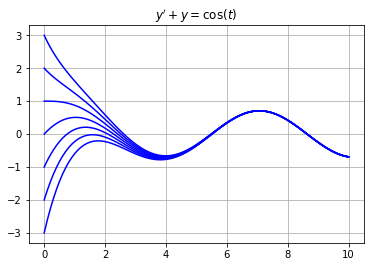

In [2]:
t = np.linspace(0,10,100)
for y0 in range(-3,4):
    C = y0 - 1/2
    y = C*np.exp(-t) + (np.cos(t) + np.sin(t))/2
    plt.plot(t,y,'b')
plt.title("$y' + y = \cos(t)$"), plt.grid(True)
plt.show()

Notice that all solutions in this example converge to the solution

$$
y(t) = \frac{\cos(t) + \sin(t)}{2}
$$

as $t \to \infty$.

## Separable Equations

A first order equation is [separable](https://en.wikipedia.org/wiki/Separation_of_variables) if it is of the form

$$
y' = f(t) g(y)
$$

for some functions $f(t)$ and $g(y)$. For example, the equation

$$
y' = -2ty^2
$$

is a first order separable equation. Note that the equation is nonlinear. Use the method of [separation of variables](https://www.jirka.org/diffyqs/html/separable_section.html) to compute the general solution

$$
y(t) = \frac{1}{t^2 + C}
$$

The constant $C$ is determined by the initial value $y(0) = 1/C$ (except $y(t) = 0$ if $y(0)=0$). Plot the solution $y(t)$ over the interval $0 \leq t \leq 5$ for each initial value $y(0)=1,\dots,5$.

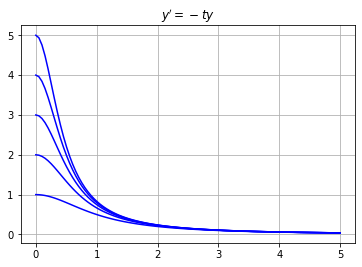

In [3]:
t = np.linspace(0,5,100)
for y0 in range(1,6):
    C = 1/y0
    y = 1/(t**2 + C)
    plt.plot(t,y,'b')
plt.title("$y' = -ty$"), plt.grid(True)
plt.show()

Notice that all solutions in this example converge $y(t) \to 0$ as $t \to \infty$.

## Autonomous Equations

A first order equation is [autonomous](https://en.wikipedia.org/wiki/Autonomous_system_(mathematics)) if it is of the form

$$
y' = f(y)
$$

where the right side $f(y)$ does not depend on the independent variable $t$. Note that an autonomous equation is also separable. For example, the equation

$$
y' = y(1 - y)
$$

is a first order autonomous equation. Compute the general solution using separation of variables

$$
y(t) = \frac{Ce^t}{1 + Ce^t}
$$

The constant $C$ is determined by the initial value $y(0) = C/(1 + C)$ (except $y(t)=0$ when $y(0)=1$). Plot the solution $y(t)$ over the interval $0 \leq t \leq 2$ for each initial value

$$
y(0)=-0.1,0.0,0.5,1.0,1.5,2.0,3.0
$$

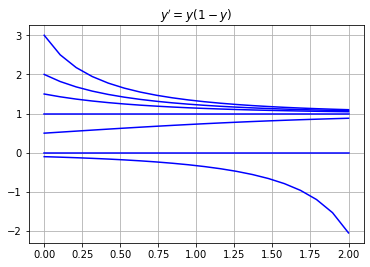

In [4]:
t = np.linspace(0,2,20)
for y0 in [-0.1,0.0,0.5,1.5,2,3]:
    C = y0/(1 - y0)
    y = C*np.exp(t)/(1 + C*np.exp(t))
    plt.plot(t,y,'b')
plt.plot([0,2],[1,1],'b') # Plot constant solution y(t)=1
plt.title("$y' = y(1-y)$"), plt.grid(True)
plt.show()

Notice that all solutions $y(t)$ with intial value $y(0)>0$ converge $y(t) \to 1$ as $t \to \infty$. Also $y(t)=0$ for all $t$ if $y(0)=0$. Finally $y(t) \to -\infty$ as $t \to \infty$ if $y(0) < 0$.

## Slope Fields

In the examples above, we were able to find the general solution of the first order differential equation and plot the solution for different intial values. However most differential equations cannot be solved explicitly with elementary functions. So what do we do? We can *always* approximate solutions with numerical methods and graphical methods.

The [slope field](https://www.jirka.org/diffyqs/html/slopefields_section.html) of a first order differential equation $y'=f(t,y)$ is a graphical method for visualizing solutions. The idea is that an equation $y'=f(t,y)$ gives us complete information about the slope of a solution at any point even if we don't know a formula for the solution. Create a slope field by simply drawing a small line of slope $f(t,y)$ at various points $(t,y)$ in a grid in the $ty$-plane.

For example, plot the slope field of $y' = \sin(2\pi t) - \cos(2 \pi y)$ in the range $-1 \leq t \leq 2$, $-2 \leq y \leq 2$ with grid step size $h=0.1$.

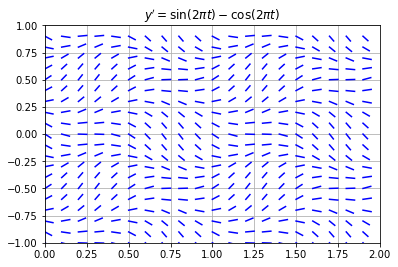

In [5]:
f = lambda t,y: np.sin(2*np.pi*t) - np.cos(2*np.pi*y)
h = 0.1; L = 0.5*h;
t_grid = np.arange(0,2,h)
y_grid = np.arange(-1,1,h)
for t in t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t,t + L*np.cos(theta)],
                 [y,y + L*np.sin(theta)],'b')

plt.title("$y' = \sin(2 \pi t) - \cos(2 \pi t)$")
plt.grid(True), plt.xlim([0,2]), plt.ylim([-1,1])
plt.show()

The slope field allows us to describe the behaviour of solutions. For example, estimate the value $y(2)$ for the unique solution $y(t)$ of the equation $y' = \sin(2 \pi t) - \cos(2 \pi t)$ satisfying the intial condition $y(0)=0$. Starting at $y(0)=0$ we trace the path through the slope field to find $y(2) \approx -0.4$.

## Euler's Method

The simplest numerical method for approximating solutions of differential equations is [Euler's method](https://en.wikipedia.org/wiki/Euler_method). Consider a first order differential equation with an initial condition:

$$
y' = f(t,y) \ , \ \ y(t_0)=y_0
$$

The idea behind Euler's method is:

1. Contruct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$:

    $$
    y = y(t_0) + f(t_0,y_0)(t - t_0)
    $$

    where $y'(t_0) = f(t_0,y_0)$ is the slope of $y(t)$ at $t=t_0$.

2. Use the tangent line to approximate $y(t)$ at a small time step $t_1 = t_0 + h$:

    $$
    y_1 = y_0 + f(t_0,y_0)(t_1 - t_0)
    $$
    
    where $y_1 \approx y(t_1)$.

3. Repeat!

The formula for Euler's method defines a recursive sequence:

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(t_0)
$$

where $y_n \approx y(t_n)$ for each $n$. If we choose equally spaced $t$ values then the formula becomes:

$$
y_{n+1} = y_n + f(t_n,y_n)h \ \ , \ \ y_0 = y(t_0) \ , \ \ t_n = t_0 + nh 
$$

with time step $h = t_{n+1} - t_n$. If we implement $N$ iterations of Euler's method from $t_0$ to $t_f$ then the time step is

$$
h = \frac{t_f - t_0}{N}
$$

Note two very important points about Euler's method and numerical methods in general:

* A smaller time step $h$ reduces the error in the approximation.
* A smaller time step $h$ requires more computations!

### Implementation

Write a function called `odeEuler` which takes 3 input parameters `f`, `t` and `y0` where:

* `f` is a function which represents the right side of a first order differential equation $y' = f(t,y)$
* `t` is a 1D NumPy array
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the value `t[0]`

The function `odeEuler` implements Euler's method and returns a 1D NumPy array of $y$ values (with length `len(t)`) which approximates the solution $y(t)$ of the differential equation $y' = f(t,y)$, $y(t_0)=y_0$.

In [9]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

### Examples

#### Example 1

Compute the Euler's method approximation of the solution of $y' = -y,y(0)=1$ using step size $h=0.25$. Plot the approximation along with the exact solution $y(t)=e^{-t}$ on the interval $0 \leq t \leq 2$.

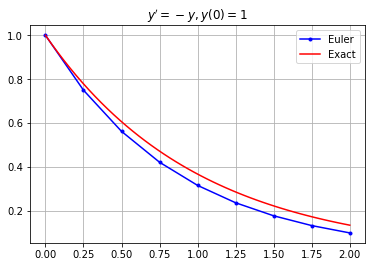

In [7]:
f = lambda t,y: -y
t0 = 0; tf = 2; h = 0.25; N = int((tf - t0)/h);
t = np.linspace(t0,tf,N+1); y0 = 1;
y = odeEuler(f,t,y0)
plt.plot(t,y,'b.-'), plt.grid(True)
t_exact = np.linspace(t0,tf,50)
y_exact = np.exp(-t_exact)
plt.plot(t_exact,y_exact,'r')
plt.title("$y'=-y,y(0)=1$"), plt.legend(["Euler","Exact"])
plt.show()

#### Example 2

Consider the equation $y' = 1 - y$. Plot the Euler's method approximation for different initial values along with the slope field.

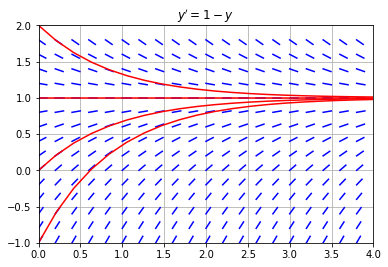

In [8]:
f = lambda t,y: 1 - y
h = 0.2; L = 0.5*h;
t_grid = np.arange(0,4,h)
y_grid = np.arange(-1,2,h)
for t in t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t,t + L*np.cos(theta)],
                 [y,y + L*np.sin(theta)],'b')

t = np.linspace(0,4,20)
for y0 in range(-1,3):
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'r-')

plt.grid(True), plt.xlim([0,4]), plt.ylim([-1,2])
plt.title("$y' = 1 - y$")
plt.show()

#### Example 3

Consider the equation $y' = \sin(2 \pi t) - \cos(2 \pi y)$. Plot the Euler's method approximation for different initial values along with the slope field.

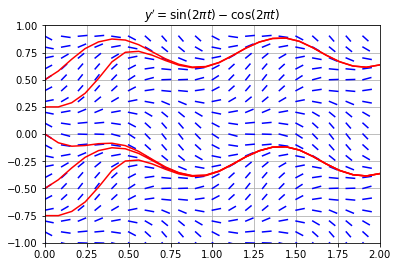

In [9]:
f = lambda t,y: np.sin(2*np.pi*t) - np.cos(2*np.pi*y)
h = 0.1; L = 0.5*h;
t_grid = np.arange(0,2,h)
y_grid = np.arange(-1,1,h)
for t in t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t,t + L*np.cos(theta)],
                 [y,y + L*np.sin(theta)],'b')

t = np.linspace(0,2,26)
for y0 in [-0.75,-0.5,0.0,0.25,0.5]:
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'r-')

plt.grid(True), plt.xlim([0,2]), plt.ylim([-1,1])
plt.title("$y' = \sin(2 \pi t) - \cos(2 \pi t)$")
plt.show()

## Exercises

**Exercise 1.** Plot the slope field of $y' = \sin(t) + \cos(y)$ in the range $0 \leq t \leq 2\pi$, $-2 \leq y \leq 2$ with step size $h = 0.2$ in the grid. If $y(t)$ is the solution with intial value $y(0) = 0.5$, estimate the value $y(2\pi)$.